### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [32]:
df = pd.read_excel("C:\\Users\\ASUS\\code\\customer-purchase-behavior-analysis\\archive\\online_retail_II.xlsx")

df.shape

(525461, 8)

### Preview Data

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,TotalPrice,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [9]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


### Data Cleaning

In [10]:
df.columns = df.columns.str.replace(" ", "_")

In [15]:
df = df.dropna(subset=["Customer_ID"])

df.shape

(417534, 8)

In [16]:
df["Description"] = df["Description"].fillna("Unknown")

In [17]:
df = df[df["Quantity"] > 0]
df = df[df["Price"] > 0]

df.shape

(407664, 8)

In [18]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [19]:
df[["Quantity", "Price", "TotalPrice"]].head()

,Quantity,Price,TotalPrice
0,12,6.95,83.4
1,12,6.75,81.0
2,12,6.75,81.0
3,48,2.10,100.8
4,24,1.25,30.0


In [ ]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer_ID    0
Country        0
TotalPrice     0
dtype: int64

In [21]:
df.describe()


,Quantity,InvoiceDate,Price,Customer_ID,TotalPrice
count,407664.000000,407664,407664.000000,407664.000000,407664.000000
mean,13.585585,2010-07-01 10:15:11.871688192,3.294438,15368.592598,21.664909
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,0.001000
25%,2.000000,2010-03-26 14:01:00,1.250000,13997.000000,4.950000
50%,5.000000,2010-07-09 15:47:00,1.950000,15321.000000,11.900000
75%,12.000000,2010-10-14 17:09:00,3.750000,16812.000000,19.500000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000,15818.400000
std,96.840747,NaN,34.757965,1679.762138,77.150058


# Exploratory Data Analysis (EDA) 

#### Top 10 Countries by Revenue

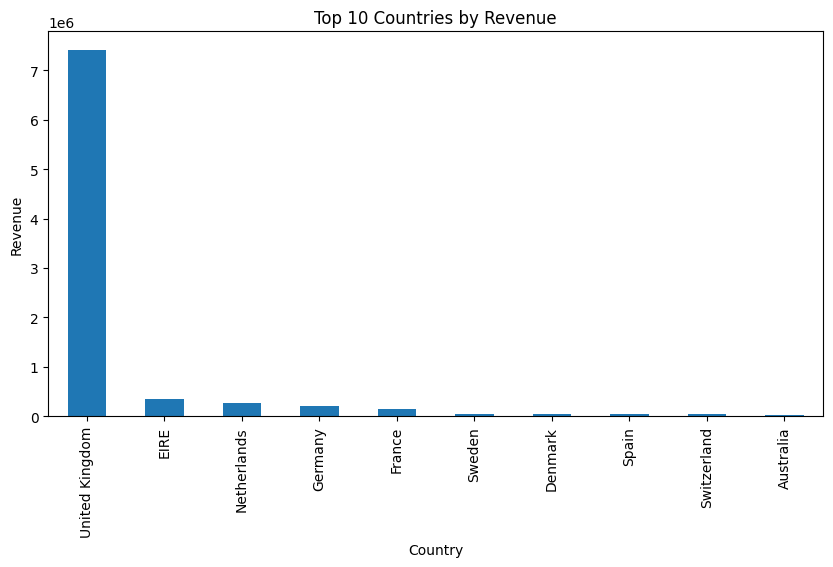

In [22]:
import matplotlib.pyplot as plt

country_revenue = (
    df.groupby("Country")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

country_revenue.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Countries by Revenue")
plt.ylabel("Revenue")
plt.xlabel("Country")
plt.show()


#### Monthly Sales Trend

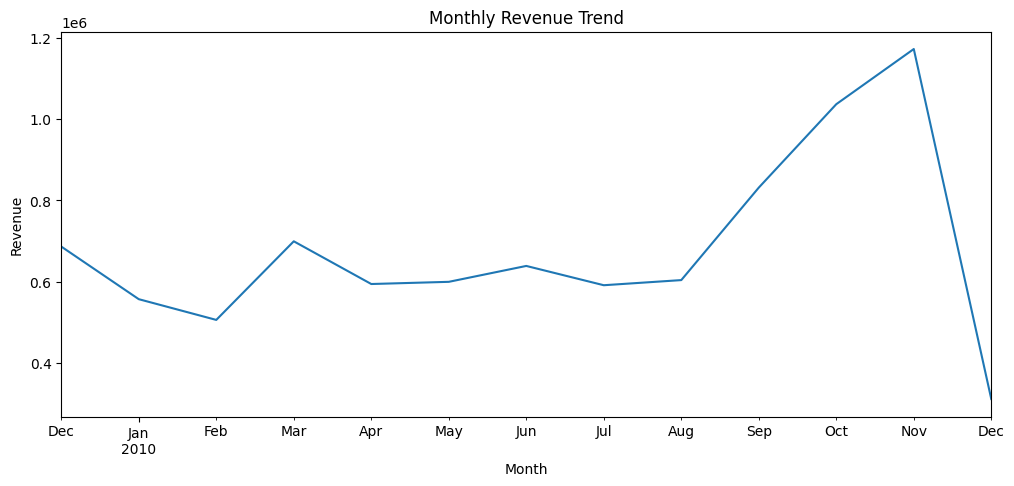

In [23]:
df["Month"] = df["InvoiceDate"].dt.to_period("M")

monthly_sales = df.groupby("Month")["TotalPrice"].sum()

monthly_sales.plot(figsize=(12,5))
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.show()


#### Customer Spending Distribution

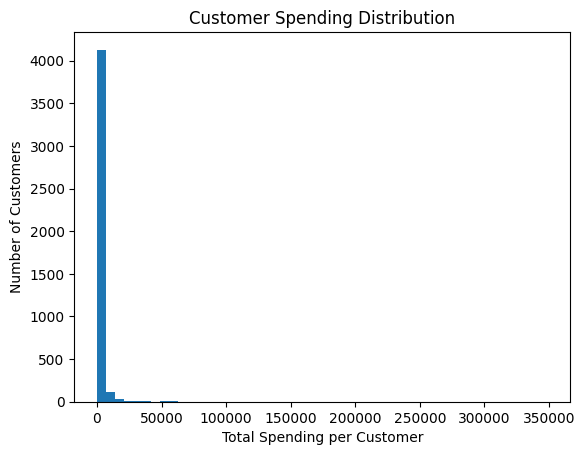

In [ ]:
customer_spending = df.groupby("Customer_ID")["TotalPrice"].sum()

plt.hist(customer_spending, bins=50)
plt.xlabel("Total Spending per Customer")
plt.ylabel("Number of Customers")
plt.title("Customer Spending Distribution")
plt.show()


#### Identify High-Value Customers

Top 10% of customers are classified as high-value customers.

In [25]:
threshold = customer_spending.quantile(0.90)

high_value_customers = customer_spending[
    customer_spending >= threshold
]

len(high_value_customers)


432

In [29]:
df["Customer_ID"].unique()[:10]

array([13085., 13078., 15362., 18102., 12682., 18087., 13635., 14110.,
       12636., 17519.])

#### Top Products by Revenue

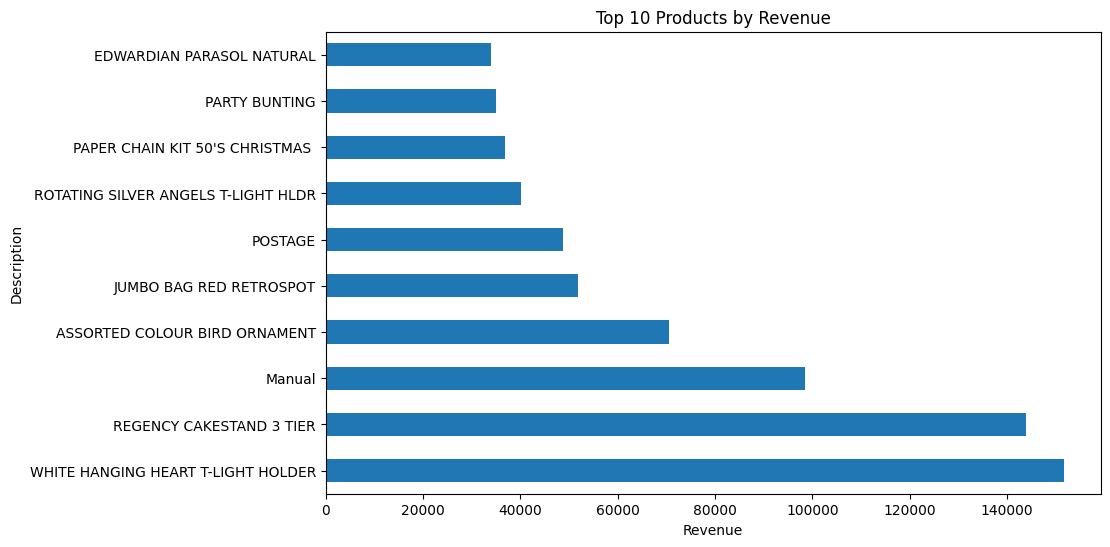

In [26]:
top_products = (
    df.groupby("Description")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products.plot(kind="barh", figsize=(10,6))
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.show()


#### Final Key Insights

- Cleaned messy data by removing invalid and incomplete records
- Identified seasonal sales trends
- Found that top 10% of customers generate most of the revenue
- UK is the dominant revenue-contributing country

This analysis helps retailers identify high-value customers,
optimize inventory planning, and design targeted marketing strategies
based on purchasing behavior.
